In [1]:
import sacc

In [12]:
t1 = sacc.Sacc.load_fits("/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/dc2/outputs/cluster_sacc_catalog.sacc") 
t2 = sacc.Sacc.load_fits("/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full/cluster_sacc_catalog.sacc") 

/sps/lsst/users/ebarroso/conda_envs/firecrown_clp/lib/python3.13/site-packages/sacc/sacc.py:935: UserWarning: The FITS format without the 'sacc_ordering' column is deprecated. Assuming data rows are in the correct order as it was before version 1.0.
  warnings.warn(
/sps/lsst/users/ebarroso/conda_envs/firecrown_clp/lib/python3.13/site-packages/sacc/sacc.py:935: UserWarning: The FITS format without the 'sacc_ordering' column is deprecated. Assuming data rows are in the correct order as it was before version 1.0.
  warnings.warn(


In [13]:
OMP_NUM_THREADS=1  mpirun -n 3 python3 -m txpipe CLClusterEnsembleProfiles   --cluster_catalog_tomography=/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/dc2/outputs//cluster_catalog_tomography.hdf5   --fiducial_cosmology=/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/fiducial_cosmology.yml   --cluster_shear_catalogs=/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/dc2/outputs//cluster_shear_catalogs.hdf5   --config=./cosmodc2_config_in2p3.yml   --cluster_profiles=/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/dc2/outputs//cluster_profiles.pkl --mpi
Output writing to ./logs/CLClusterEnsembleProfiles.out

[DataPoint(data_type='cluster_counts', tracers=(np.str_('cosmodc2-20deg2-CL'), np.str_('bin_rich_0'), np.str_('bin_z_0')), value=4200, ),
 DataPoint(data_type='cluster_counts', tracers=(np.str_('cosmodc2-20deg2-CL'), np.str_('bin_rich_0'), np.str_('bin_z_1')), value=7952, ),
 DataPoint(data_type='cluster_counts', tracers=(np.str_('cosmodc2-20deg2-CL'), np.str_('bin_rich_0'), np.str_('bin_z_2')), value=7511, ),
 DataPoint(data_type='cluster_counts', tracers=(np.str_('cosmodc2-20deg2-CL'), np.str_('bin_rich_1'), np.str_('bin_z_0')), value=1182, ),
 DataPoint(data_type='cluster_counts', tracers=(np.str_('cosmodc2-20deg2-CL'), np.str_('bin_rich_1'), np.str_('bin_z_1')), value=2238, ),
 DataPoint(data_type='cluster_counts', tracers=(np.str_('cosmodc2-20deg2-CL'), np.str_('bin_rich_1'), np.str_('bin_z_2')), value=2437, ),
 DataPoint(data_type='cluster_counts', tracers=(np.str_('cosmodc2-20deg2-CL'), np.str_('bin_rich_2'), np.str_('bin_z_0')), value=198, ),
 DataPoint(data_type='cluster_count

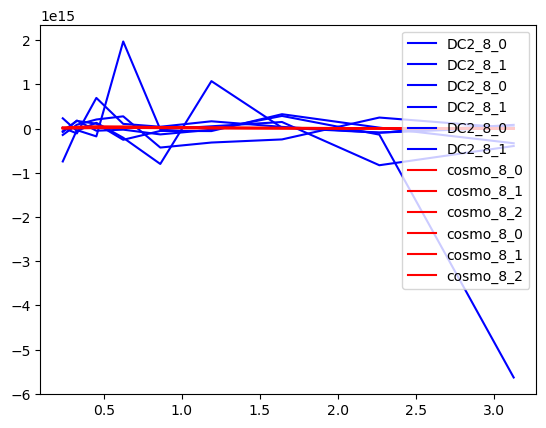

In [21]:
import sacc
import matplotlib.pyplot as plt
import numpy as np
for k in range(0,3):
    for j in range(0,2):
        data2 = []
        radius2 = []
        for i in range(0,9):
            trac = ('cosmodc2-440deg2-CL', f'bin_rich_{j}', f'bin_z_{k}', f'radius_{i}')
            data2.append(t1.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
            radius = (t1.tracers[f'radius_{i}'].upper + t1.tracers[f'radius_{i}'].lower)/2
            radius2.append(radius)
        plt.plot(radius2, data2, color="blue", label=f'DC2_{i}_{j}')



for k in range(0,2):
    for j in range(0,3):
        data2 = []
        radius2 = []
        for i in range(0,9):
            trac = ('cosmodc2-20deg2-CL', f'bin_rich_{j}', f'bin_z_{k}', f'radius_{i}')
            data2.append(t2.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
            radius = (t2.tracers[f'radius_{i}'].upper + t2.tracers[f'radius_{i}'].lower)/2
            radius2.append(radius)
        plt.plot(radius2, data2, color="red", label=f'cosmo_{i}_{j}')
        plt.legend(loc='upper right')
plt.show()

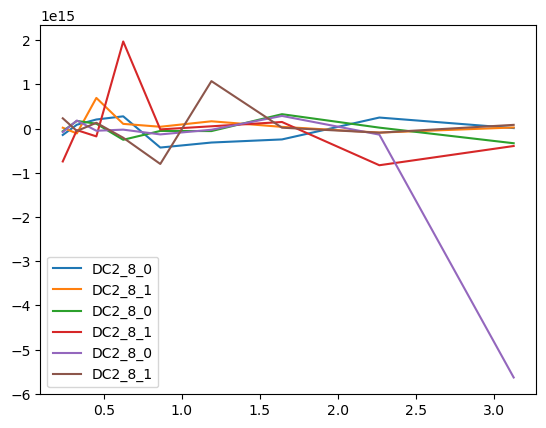

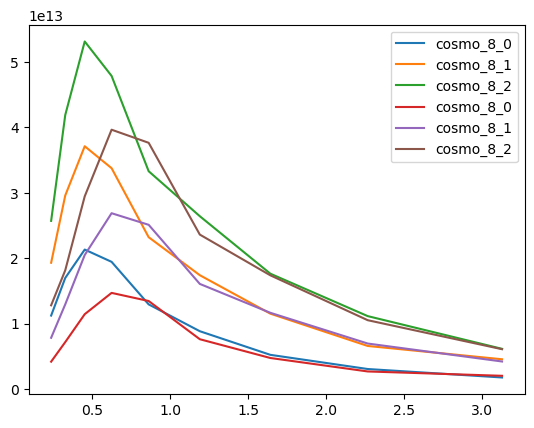

In [23]:
import sacc
import matplotlib.pyplot as plt
import numpy as np
for k in range(0,3):
    for j in range(0,2):
        data2 = []
        radius2 = []
        for i in range(0,9):
            trac = ('cosmodc2-440deg2-CL', f'bin_rich_{j}', f'bin_z_{k}', f'radius_{i}')
            data2.append(t1.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
            radius = (t1.tracers[f'radius_{i}'].upper + t1.tracers[f'radius_{i}'].lower)/2
            radius2.append(radius)
        plt.plot(radius2, data2, label=f'DC2_{i}_{j}')
        plt.legend()
plt.show()


for k in range(0,2):
    for j in range(0,3):
        data2 = []
        radius2 = []
        for i in range(0,9):
            trac = ('cosmodc2-20deg2-CL', f'bin_rich_{j}', f'bin_z_{k}', f'radius_{i}')
            data2.append(t2.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
            radius = (t2.tracers[f'radius_{i}'].upper + t2.tracers[f'radius_{i}'].lower)/2
            radius2.append(radius)
        plt.plot(radius2, data2, label=f'cosmo_{i}_{j}')
        plt.legend(loc='upper right')
plt.show()